In [136]:
import pandas as pd 
import numpy as np

In [137]:
import os
import sys

root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
fetching_data_module_folder = root_folder + "\\fetch_data"
imputing_data_module_folder = root_folder + "\\data_imputation"
imputed_data_folder = root_folder + "\\data_imputation"
imputed_ndvi_path = imputed_data_folder + "\\ndvi_imputed.csv"
imputed_tracegas_path = imputed_data_folder + "\\tracegas_imputed.csv"
cloud_o3_aai_path = imputed_data_folder + "\\CLOUD_O3_AAI_imputed.csv"

sys.path.insert(0, fetching_data_module_folder)
sys.path.insert(1, imputing_data_module_folder)

from fetching_satellite_based import remote_sensing_factor_df
from fetching_meteorological import meteorological_df

In [138]:
meteorological_df = meteorological_df()
meteorological_df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438


In [139]:
imputed_ndvi_df = pd.read_csv(imputed_ndvi_path).rename(columns={'date':'time'})
imputed_ndvi_df['time'] = pd.to_datetime(imputed_ndvi_df['time'])
imputed_ndvi_df

,lon,lat,time,ID,NDVI
0,105.850899,21.021299,2001-01-01,5,0.056508
1,105.850899,21.021299,2001-01-02,5,0.010700
2,105.850899,21.021299,2001-01-03,5,-0.004222
3,105.850899,21.021299,2001-01-04,5,-0.001730
4,105.850899,21.021299,2001-01-05,5,-0.002398
...,...,...,...,...,...
199415,105.853941,21.023532,2021-12-27,300,0.001190
199416,105.853941,21.023532,2021-12-28,300,0.010594
199417,105.853941,21.023532,2021-12-29,300,-0.005183
199418,105.853941,21.023532,2021-12-30,300,0.015569


In [140]:
tracegas_factors = ['CO', 'HCHO', 'NO2', 'SO2']
imputed_tracegas_df = pd.read_csv(imputed_tracegas_path).rename(columns={'date':'time'})
imputed_tracegas_df['time'] = pd.to_datetime(imputed_tracegas_df['time'], format='ISO8601')
imputed_tracegas_df = imputed_tracegas_df.sort_values(by=['time', 'ID'])
imputed_tracegas_df

,time,ID,CLOUD,CO,HCHO,NO2,O3,SO2,AAI
16,2019-01-01,5,1.000000,0.047772,0.000128,0.000100,0.100538,-0.000022,-1.112399
13,2019-01-01,19,1.000000,0.047832,0.000137,0.000093,0.100318,-0.000036,-1.279025
17,2019-01-01,51,1.000000,0.047508,0.000130,0.000086,0.101136,-0.000034,-1.010720
18,2019-01-01,52,1.000000,0.047442,0.000116,0.000099,0.099946,-0.000006,-0.925846
19,2019-01-01,53,1.000000,0.047457,0.000126,0.000090,0.100431,-0.000027,-0.859729
...,...,...,...,...,...,...,...,...,...
56742,2024-12-31,172,0.548964,NaN,NaN,NaN,0.114208,NaN,-0.650442
56743,2024-12-31,173,0.457147,0.046150,NaN,NaN,0.113423,NaN,-0.660913
56744,2024-12-31,175,0.655623,NaN,NaN,NaN,0.114531,NaN,-0.580081
56746,2024-12-31,195,1.000000,NaN,NaN,NaN,0.113886,NaN,-0.406657


In [141]:
cloud_o3_aai_factors = ['CLOUD', 'O3', 'AAI']
imputed_cloud_o3_aai_df = pd.read_csv(cloud_o3_aai_path).rename(columns={'date':'time'})
imputed_cloud_o3_aai_df['time'] = pd.to_datetime(imputed_cloud_o3_aai_df['time'])
imputed_cloud_o3_aai_df

,lon,lat,time,ID,CLOUD,O3,AAI
0,105.850899,21.021299,2019-01-01,5,1.000000,0.100538,-1.112399
1,105.741867,21.049749,2019-01-01,19,1.000000,0.100318,-1.279025
2,105.948544,21.200344,2019-01-01,51,1.000000,0.101136,-1.010720
3,106.288330,21.123247,2019-01-01,52,1.000000,0.099946,-0.925846
4,106.111371,21.152745,2019-01-01,53,1.000000,0.100431,-0.859729
...,...,...,...,...,...,...,...
56987,106.314003,20.927000,2024-12-31,172,0.548964,0.114208,-0.650442
56988,106.430801,20.977400,2024-12-31,173,0.457147,0.113423,-0.660913
56989,106.385597,21.116400,2024-12-31,175,0.655623,0.114531,-0.580081
56990,105.367302,21.338470,2024-12-31,195,1.000000,0.113886,-0.406657


In [142]:
def merging(left_df: pd.DataFrame, right_df: pd.DataFrame, factors: list):
    
    matching_columns = ['ID', 'time']
    
    merged_df = pd.merge(
        left=left_df,
        right=right_df[matching_columns + factors],
        on=matching_columns,
        how='left'
    )
    
    return merged_df

In [143]:
combination_df = meteorological_df.copy()
combination_df = merging(combination_df, imputed_ndvi_df, factors=['NDVI'])
combination_df = merging(combination_df, imputed_tracegas_df, factors=tracegas_factors)
combination_df = merging(combination_df, imputed_cloud_o3_aai_df, factors=cloud_o3_aai_factors)
combination_df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,65.837502,102317.015625,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,63.812500,102335.617188,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,65.050003,102115.812500,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,70.632500,101743.898438,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096


In [144]:
combination_df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,65.837502,102317.015625,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,63.812500,102335.617188,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,65.050003,102115.812500,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,70.632500,101743.898438,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096


In [145]:
from linear_weighted_moving_average import lwmv_imputation

combination_df.rename(columns={'time': 'date'}, inplace=True)
combination_df = lwmv_imputation(combination_df, tracegas_factors)
combination_df.rename(columns={'date': 'time'}, inplace=True)
combination_df.sort_values(by=['time', 'ID'], inplace=True)
combination_df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,65.837502,102317.015625,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,63.812500,102335.617188,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,65.050003,102115.812500,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,70.632500,101743.898438,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096


In [146]:
# combination_df.to_csv('remotesensing_atmospheric.csv', index=False)

In [147]:
combination_df.columns

Index(['time', 'ID', 'pm25', 'lat', 'lon', 'SQRT_SEA_DEM_LAT', 'WSPD', 'WDIR',
       'TMP', 'TX', 'TN', 'TP', 'RH', 'PRES2M', 'NDVI', 'CO', 'HCHO', 'NO2',
       'SO2', 'CLOUD', 'O3', 'AAI'],
      dtype='object')

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the figure size
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 10})

<Figure size 2000x1600 with 0 Axes>

# Correlation Matrix Visualization

Creating a correlation matrix to visualize the relationships between various features in our dataset. This will help us identify which features are strongly correlated with each other.

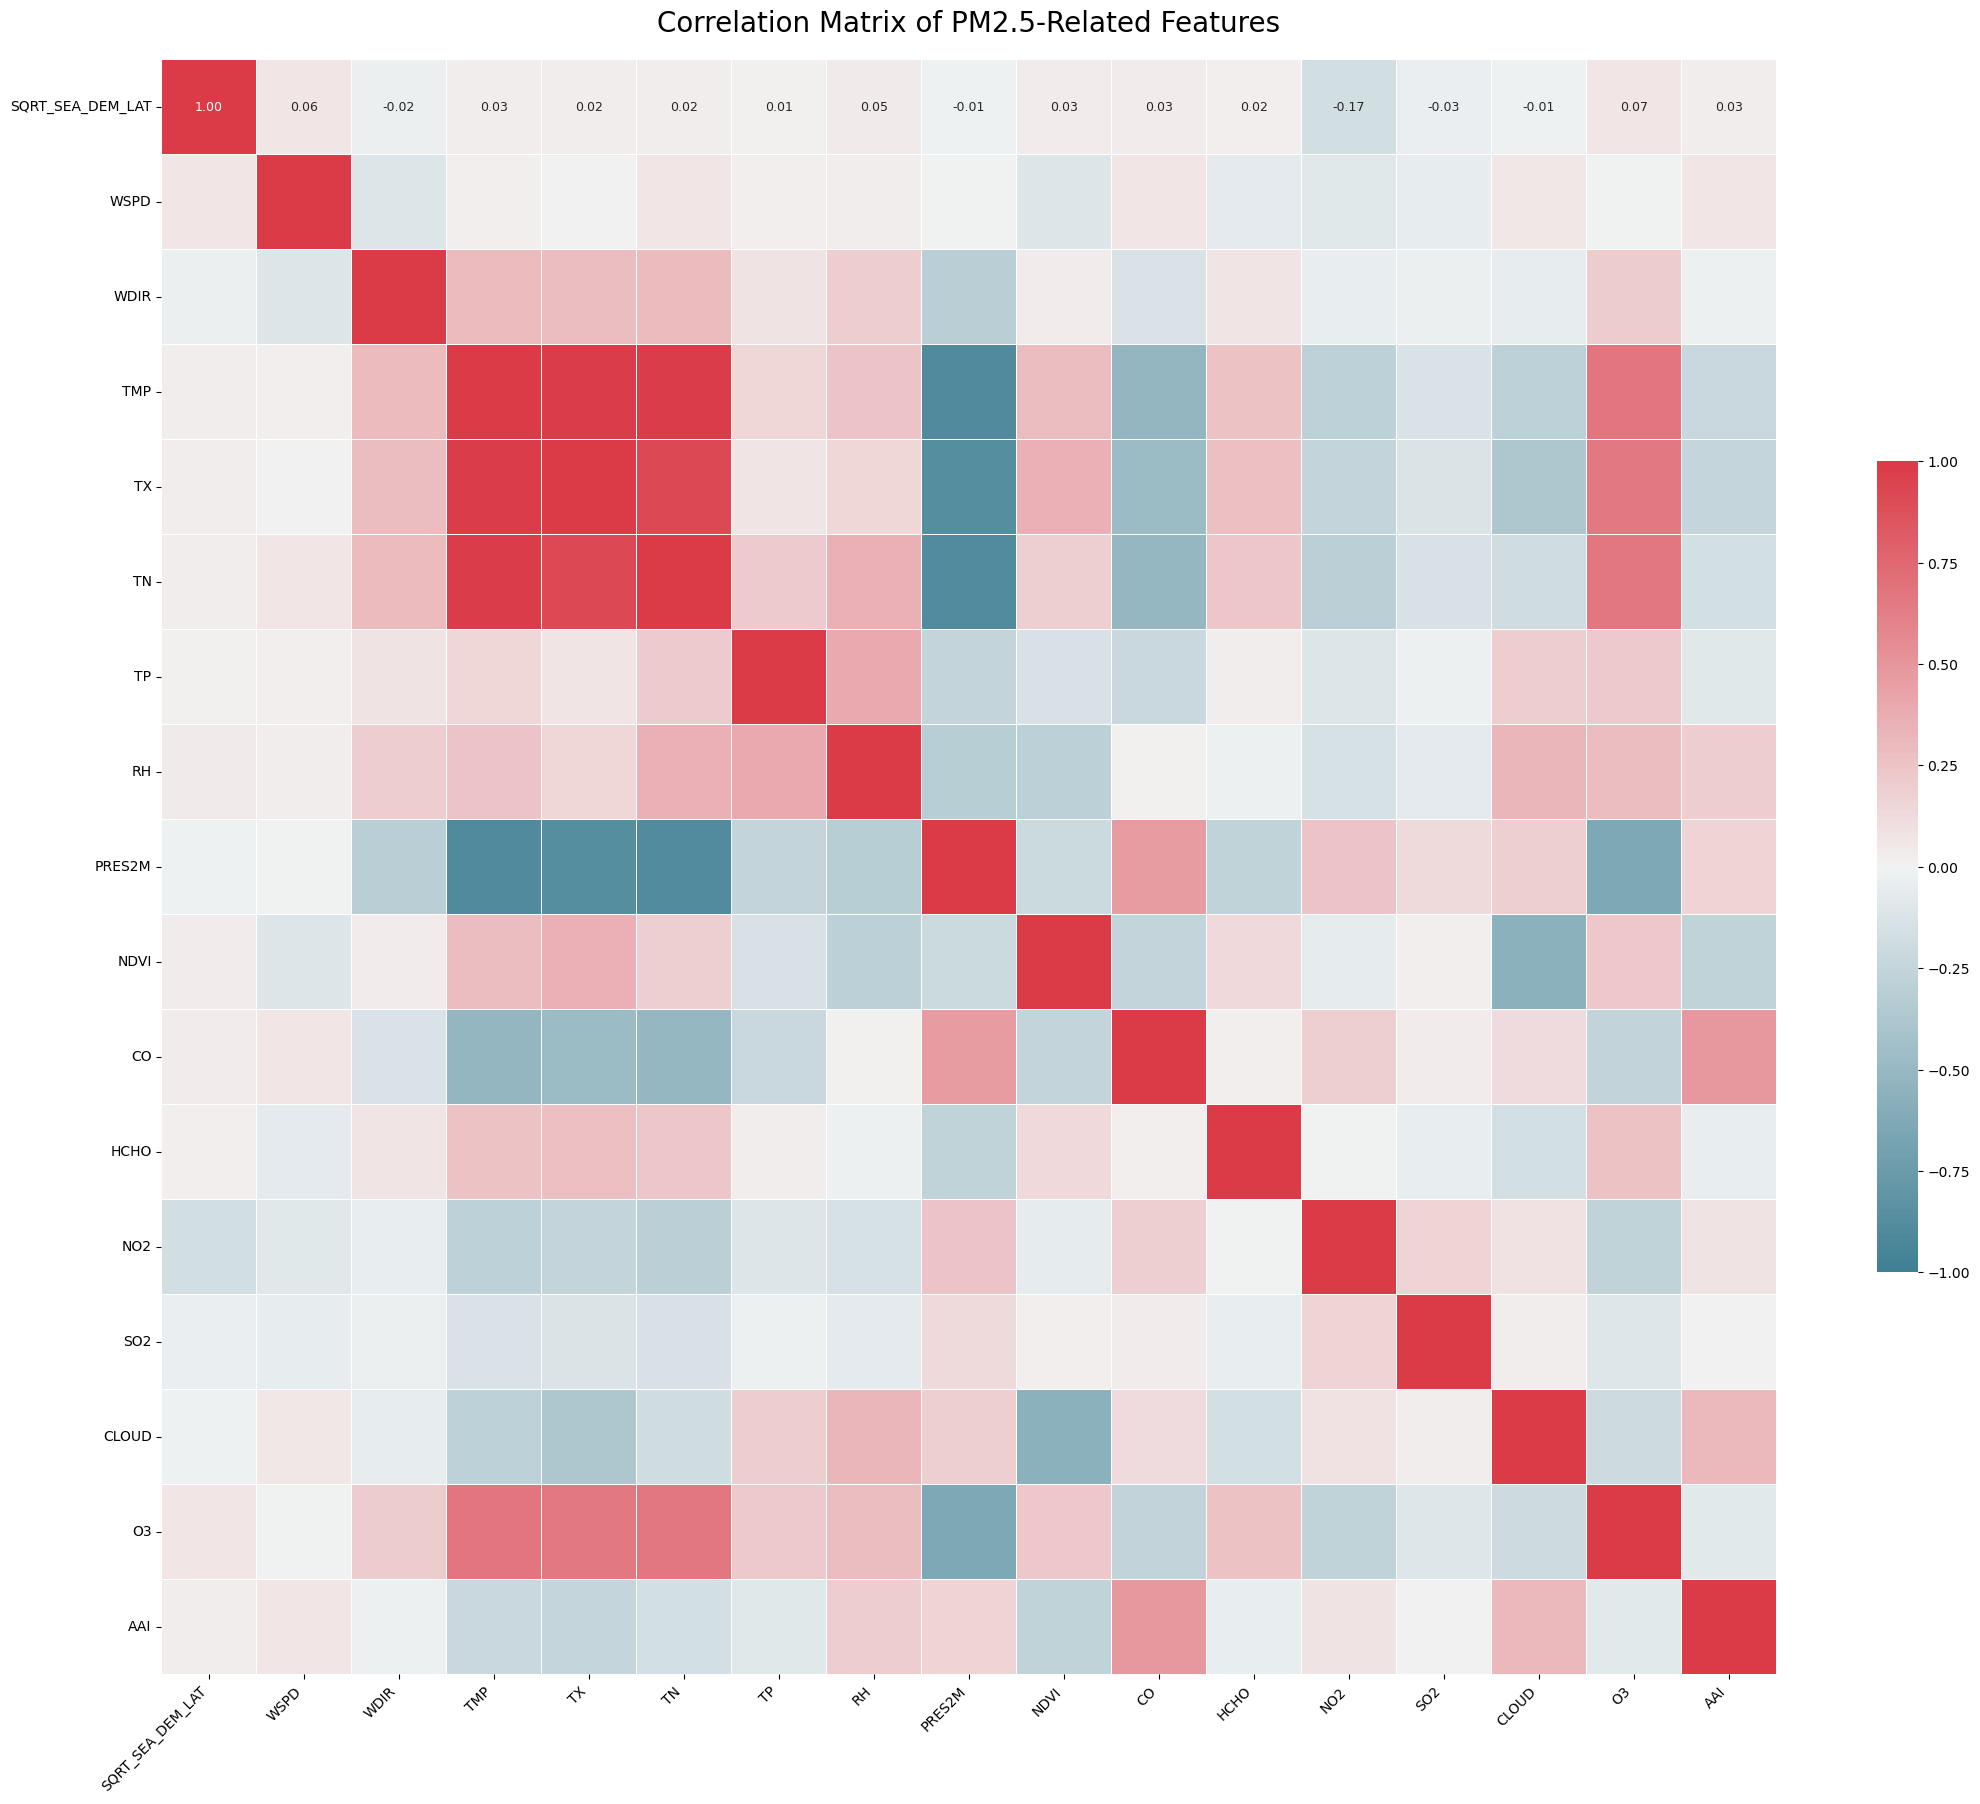

In [154]:
# Select the features for correlation analysis
features_to_correlate = ['SQRT_SEA_DEM_LAT', 'WSPD', 'WDIR',
       'TMP', 'TX', 'TN', 'TP', 'RH', 'PRES2M', 'NDVI', 'CO', 'HCHO', 'NO2',
       'SO2', 'CLOUD', 'O3', 'AAI']

# Calculate the correlation matrix
correlation_matrix = combination_df[features_to_correlate].corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 18))

# Generate a custom diverging colormap - xanh dương cho dương, đỏ cho âm
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 220 (xanh) đến 10 (đỏ)

# Draw the heatmap with all values visible (không dùng mask)
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, fmt='.2f', annot_kws={"size": 9})

# Set title for the correlation matrix
plt.title('Correlation Matrix of PM2.5-Related Features', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Alternative Visualization with Clustermap

A clustermap groups similar features together, making it easier to identify clusters of correlated variables.

<Figure size 2000x1600 with 0 Axes>

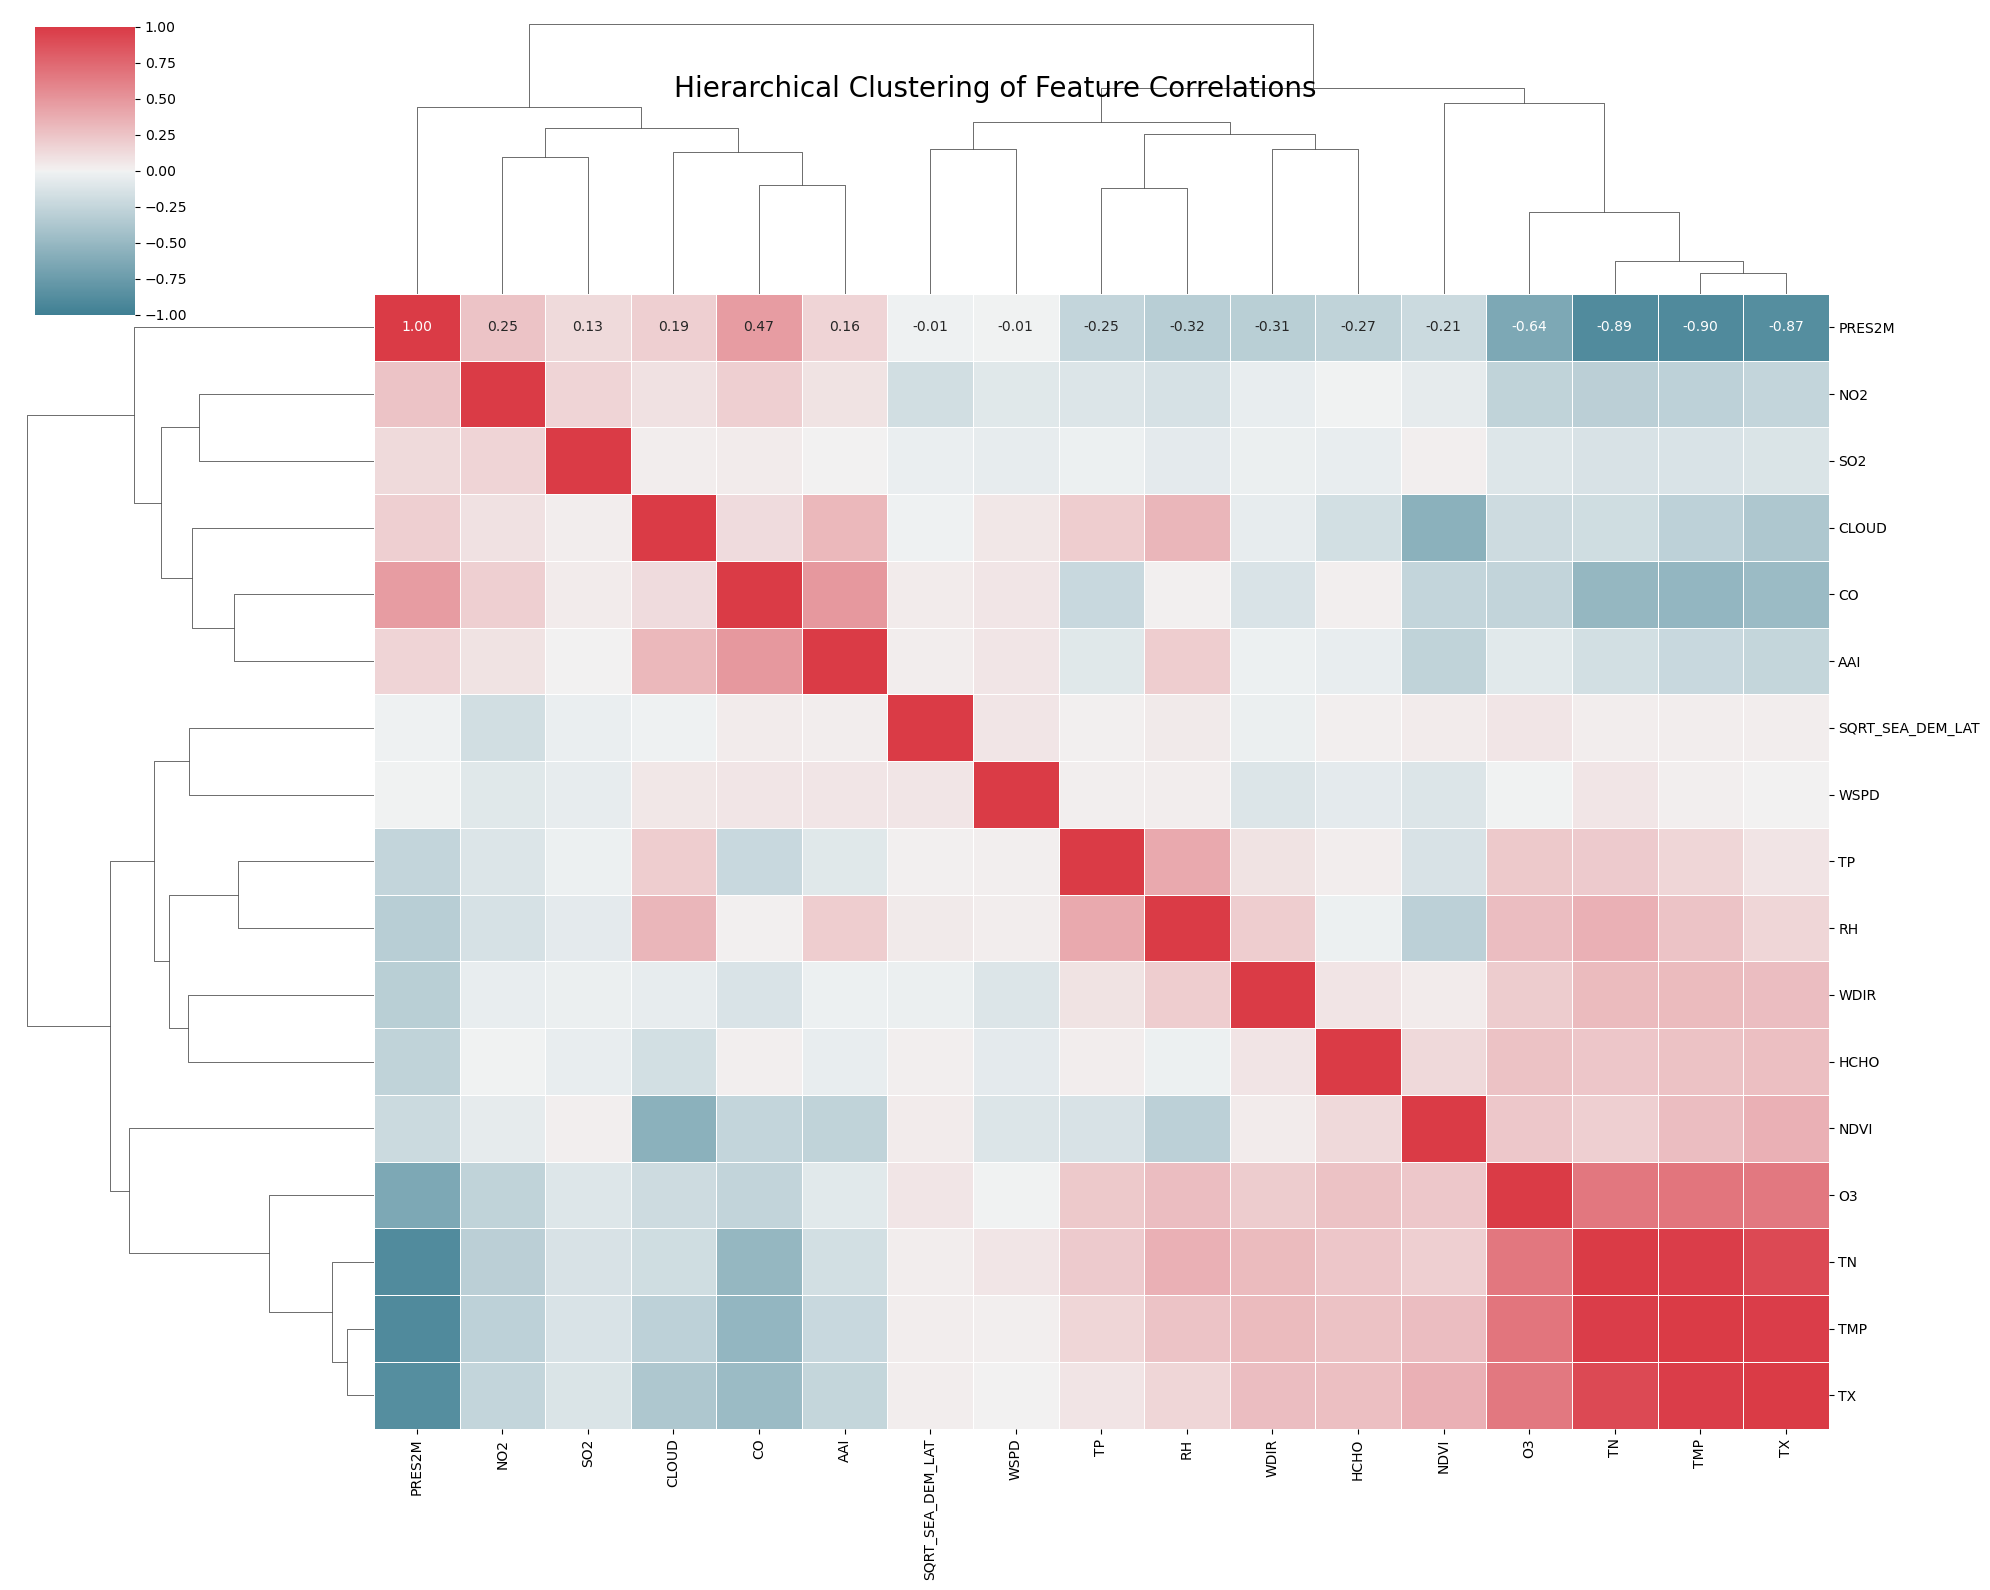

In [150]:
# Create a clustermap for hierarchical clustering of correlations
plt.figure(figsize=(20, 16))
cluster = sns.clustermap(correlation_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
                        linewidths=.5, figsize=(20, 16), annot=True, fmt='.2f')

# Adjust the title position
plt.suptitle('Hierarchical Clustering of Feature Correlations', fontsize=20, y=0.95)
plt.show()

## Correlation Analysis with PM2.5

Analyzing the correlation between all features and the PM2.5 levels, which is the target variable for pollution analysis.

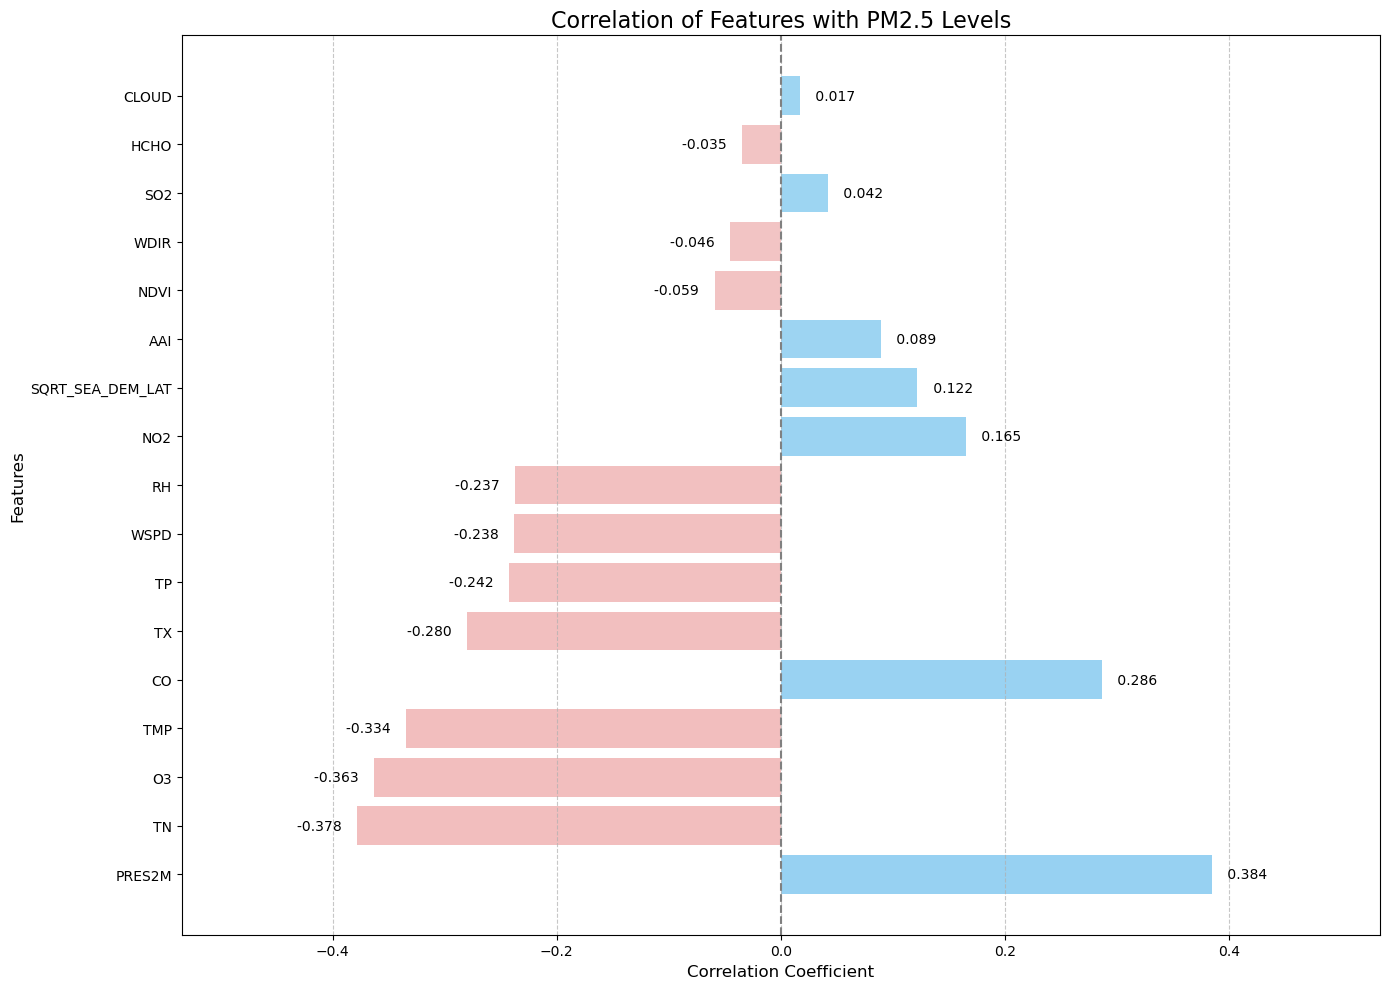

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 800x100 with 0 Axes>

In [ ]:
# Calculate correlations with PM2.5
pm25_correlations = combination_df[features_to_correlate + ['pm25']].corr()['pm25'].drop('pm25')

# Sort correlations by absolute value
sorted_corrs = pm25_correlations.abs().sort_values(ascending=False)

# Plot correlations with PM2.5
plt.figure(figsize=(14, 10))

# Tính toán giá trị tương quan lớn nhất để thiết lập giới hạn trục x
max_corr = sorted_corrs.max() + 0.15  # Tăng thêm không gian cho giá trị hiển thị
min_corr = -(sorted_corrs.max() + 0.15)  # Đảm bảo trục x cân đối

# Tạo bảng màu tùy chỉnh dịu nhẹ hơn
custom_palette = []
for val in pm25_correlations[sorted_corrs.index]:
    if val >= 0:
        # Màu xanh pastel cho tương quan dương
        base_blue = (0.65, 0.85, 0.95)  # Màu xanh dịu
        intensity = 0.3 + 0.7 * (val / 1.0)  # Cân chỉnh độ đậm
        # Phối màu dựa trên cường độ tương quan
        custom_palette.append((
            base_blue[0] - 0.1 * intensity,
            base_blue[1] - 0.05 * intensity,
            base_blue[2]
        ))
    else:
        # Màu đỏ pastel cho tương quan âm
        base_red = (0.95, 0.8, 0.8)  # Màu đỏ dịu
        intensity = 0.3 + 0.7 * (abs(val) / 1.0)
        # Phối màu dựa trên cường độ tương quan
        custom_palette.append((
            base_red[0],
            base_red[1] - 0.1 * intensity,
            base_red[2] - 0.1 * intensity
        ))

# Tạo barplot với bảng màu tùy chỉnh
bars = plt.barh(y=range(len(sorted_corrs.index)), width=pm25_correlations[sorted_corrs.index], color=custom_palette)

# Thêm nhãn feature vào trục y
plt.yticks(range(len(sorted_corrs.index)), sorted_corrs.index)

# Thêm giá trị tương quan kề sát bên ngoài thanh
for i, v in enumerate(pm25_correlations[sorted_corrs.index].values):
    if v >= 0:
        # Với thanh dương, đặt text ngay bên phải thanh
        plt.text(v + 0.01, i, f' {v:.3f}', va='center', ha='left', color='black')
    else:
        # Với thanh âm, đặt text ngay bên trái thanh
        plt.text(v - 0.01, i, f'{v:.3f} ', va='center', ha='right', color='black')

plt.title('Correlation of Features with PM2.5 Levels', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thiết lập giới hạn trục x để đảm bảo tất cả giá trị đều hiển thị trong khung
plt.xlim(min_corr, max_corr)

# Điều chỉnh lề bên trái để đẩy nhãn trục y ra xa hơn
plt.subplots_adjust(left=0.3)

plt.tight_layout()
plt.show()

# Hiển thị chú thích màu sắc với màu dịu hơn
plt.figure(figsize=(8, 1))
gradient = np.linspace(-1, 1, 256)
gradient = np.vstack((gradient, gradient))

# Tạo màu gradient dịu nhẹ từ đỏ sang xanh
colors = []
for val in np.linspace(-1, 1, 256):
    if val >= 0:
        # Màu xanh pastel cho tương quan dương
        base_blue = (0.65, 0.85, 0.95)
        intensity = 0.3 + 0.7 * val  # Cân chỉnh độ đậm
        colors.append((
            base_blue[0] - 0.1 * intensity,
            base_blue[1] - 0.05 * intensity,
            base_blue[2]
        ))
    else:
        # Màu đỏ pastel cho tương quan âm
        base_red = (0.95, 0.8, 0.8)
        intensity = 0.3 + 0.7 * abs(val)
        colors.append((
            base_red[0],
            base_red[1] - 0.1 * intensity,
            base_red[2] - 0.1 * intensity
        ))

# plt.imshow(gradient, aspect='auto', cmap=plt.matplotlib.colors.ListedColormap(colors))
plt.colorbar(label='Correlation Coefficient', orientation='horizontal')
# plt.title('Color Scale for Correlation Coefficients')
plt.xticks(np.linspace(0, 255, 9), np.linspace(-1, 1, 9).round(1))
plt.yticks([])
plt.tight_layout()
plt.show()